In [43]:
import art

In [44]:
import pandas 

In [45]:
df=pd.read_csv('../data/regression/titanic_survived/test.csv')

In [97]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [80]:
# external libs for use 
from abc import abstractmethod
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


class common():
    def __init__(self,df,**kwargs):
        self.df=df
    
    def features(self,num_col=True,obj_col=False,dt_col=False):
        df1=pd.DataFrame()
        self.features=np.array(df.columns.tolist())
        if num_col :
            s = (self.df.dtypes != 'object'  )
            self.features = np.array(s[s].index) 
        if obj_col :
            s = (self.df.dtypes == 'object' ) 
            self.features = np.array(s[s].index) 
        if dt_col :
            s = (self.df.dtypes == 'datetime64' ) 
            self.features = np.array(s[s].index) 

        df1['featues']=self.features  
        df1['count']=list(map(lambda x : self.df[x].count(),self.features))
        df1['null_values']=list(map(lambda x :self.df[x].isnull().sum(),self.features))
        df1['uniques']=list(map(lambda x :len(self.df[x].unique()),self.features))
        df1['values']=list(map(lambda x : self.df[x].unique() if len(self.df[x].unique()) < 10 else 'large spread', self.features))
        df1['value_counts']=list(map(lambda x : self.df[x].value_counts().values  if len(self.df[x].unique()) < 10 else 'large spread',self.features ))
        return df1
    
    
    def features_plot(self,plot_type):
        if plot_type=='correlation' :
            plt.subplots(figsize = (16, 9))
            sns.heatmap(self.df.corr(),annot = True,center = 0)

        

In [81]:
f2=common(df)

In [82]:
f2.features(num_col=False,obj_col=True)

,featues,count,null_values,uniques,values,value_counts
0,Name,418,0,418,large spread,large spread
1,Sex,418,0,2,"[male, female]","[266, 152]"
2,Ticket,418,0,363,large spread,large spread
3,Cabin,91,327,77,large spread,large spread
4,Embarked,418,0,3,"[Q, S, C]","[270, 102, 46]"


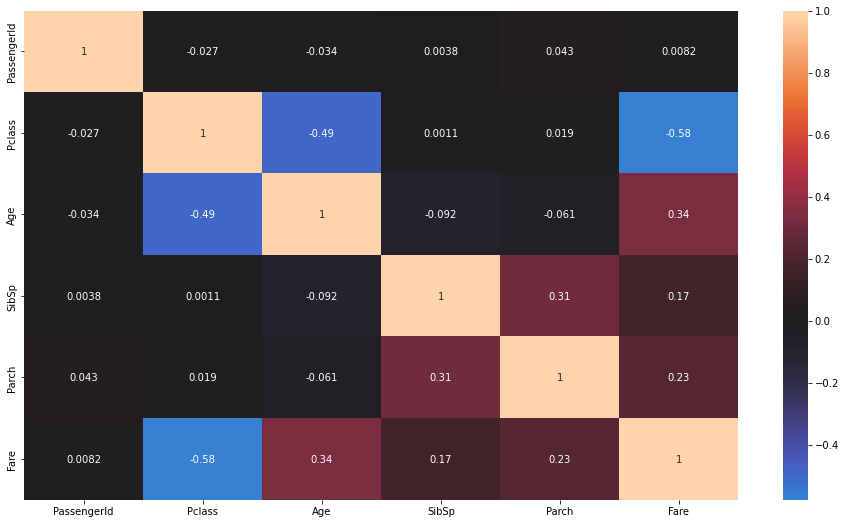

In [83]:
f2.features_plot('correlation')

In [93]:
x=df.iloc[:1].isnull().any()

In [94]:
import numpy as np

In [95]:
np.array(x)

array([False, False, False, False, False, False, False, False, False,
        True, False])

In [96]:
if True in np.array(x) :
    print('working')

working


In [99]:
df.iloc[-1:]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C
